In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DEW_tools as dew
from thermoengine import model, phases
%run core.ipynb
import dill

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/rubicon/objc/ctypes_patch.py:24: UserWarning: rubicon.objc.ctypes_patch has only been tested with Python 3.4 through 3.6. The current version is sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0). Most likely things will work properly, but you may experience crashes if Python's internals have changed significantly.
  .format(sys.version_info)
/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [182]:
plt.style.use('seaborn-paper')
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans',
          'xtick.labelsize':10, 'ytick.labelsize':10, 'axes.labelsize':10,
          'xtick.direction':'in','ytick.direction':'in','figure.figsize':(6,4),
          'xtick.top':True,'ytick.right':True}
plt.rcParams.update(params)

In [2]:
load_coder_modules(working_dir='working')
with open('DEW2019.pkl','rb') as file:
    dew2019 = dill.load(file)
    file.close()
print('Number of species = '+str(len(dew2019)))

Number of species = 228


In [3]:
working_dir = 'hp_working'
pyximport.install(language_level=3)

working_dir_code = np.array(os.listdir(working_dir))
mask = np.array([file.endswith('.pyx') for file in working_dir_code ])
mod_names = [os.path.splitext(file)[0] for file in working_dir_code[mask]]

os.chdir(working_dir)
[importlib.import_module(mod_name) for mod_name in mod_names]
os.chdir('..')

with open('hp11.pkl','rb') as file:
    hp11 = dill.load(file)
    file.close()
    print('Number of phases = ' + str(len(hp11)))

Number of phases = 2


In [112]:
Zrc = hp11['zircon']
Bad = hp11['baddeleyite']

In [5]:
working_dir = 'berman_annite'
pyximport.install(language_level=3)

working_dir_code = np.array(os.listdir(working_dir))
mask = np.array([file.endswith('.pyx') for file in working_dir_code ])
mod_names = [os.path.splitext(file)[0] for file in working_dir_code[mask]]

os.chdir(working_dir)
[importlib.import_module(mod_name) for mod_name in mod_names]
os.chdir('..')

with open('berman_annite.pkl','rb') as file:
    berman_annite = dill.load(file)
    file.close()
    print('Number of phases = ' + str(len(berman_annite)))

Number of phases = 1


In [6]:
Ann = berman_annite['Ann']

In [7]:
working_dir = 'dew_zr_working'
pyximport.install(language_level=3)

working_dir_code = np.array(os.listdir(working_dir))
mask = np.array([file.endswith('.pyx') for file in working_dir_code ])
mod_names = [os.path.splitext(file)[0] for file in working_dir_code[mask]]

os.chdir(working_dir)
[importlib.import_module(mod_name) for mod_name in mod_names]
os.chdir('..')

with open('zr_species.pkl','rb') as file:
    dewzr = dill.load(file)
    file.close()
    print('Number of phases = ' + str(len(dewzr)))

Number of phases = 5


In [8]:
dewDB = dew2019
dewDB['ZrO2,aq'] = dewzr['ZrO2,aq']
dewDB['HZrO3-'] = dewzr['HZrO3-']
dewDB['Si2O4(OH)-'] = dewzr['Si2O4(OH)-']
dewDB['NaZrSi6O-'] = dewzr['NaZrSi6O-']
dewDB['NaSi3O7-'] = dewzr['NaSi3O7-']

In [9]:
berman = model.Database()

In [10]:
H2O = berman.get_phase('H2O')
Ab = berman.get_phase('Ab')
Or = berman.get_phase('Or')
An = berman.get_phase('An')
Phl = berman.get_phase('Phl')
Prp = berman.get_phase('Prp')
Alm = berman.get_phase('Alm')
Grs = berman.get_phase('Grs')
Qz = berman.get_phase('Qz')
O2 = berman.get_phase('O2')
Sil = berman.get_phase('Sil')
Ms = berman.get_phase('Ms')
Tr = berman.get_phase('Tr')
Mag = berman.get_phase('Mag')
Clc = berman.get_phase('Clc')
Zo = berman.get_phase('Zo')
Jd = berman.get_phase('Jd')
Fs = berman.get_phase('Fs')
En = berman.get_phase('En')
Di = berman.get_phase('Di')



for phs in [Ab,Or,An,Phl,Prp,Alm,Grs,Qz,Sil,Ms,Tr,Mag,Clc,Zo,Jd,Fs,En,Di]:
    phs.enable_gibbs_energy_reference_state()

## Calibration datasets

### Zircon in water

In [75]:
bernini = pd.read_csv('Bernini2013.csv',skiprows=1)
bernini = bernini[bernini.fluid=='H2O']
bernini = bernini[bernini.mineral=='zir']
bernini = bernini[bernini.method=='HDAC']
# bernini = bernini[bernini.silica_buffer=='qz']
# bernini = bernini.reindex(labels=range(10))
bernini

,mineral,method,silica_buffer,fluid,T,P,density_H2O,SiO2,Zr,Zr_sd,log_mZr
0,zir,HDAC,qz,H2O,926,10.3,0.843,12.4,1.84,0.25,-4.69
1,zir,HDAC,qz,H2O,890,15.9,0.978,14.0,1.64,0.20,-4.74
2,zir,HDAC,qz,H2O,865,16.2,0.991,12.7,0.90,0.20,-5.01
3,zir,HDAC,qz,H2O,943,6.2,0.691,13.5,1.24,0.20,-4.87
4,zir,HDAC,qz,H2O,1015,8.1,0.740,14.1,1.94,0.75,-4.67
5,zir,HDAC,qz,H2O,983,10.0,0.812,14.8,1.59,0.40,-4.76
6,zir,HDAC,qz,H2O,930,20.0,1.029,18.5,2.59,0.85,-4.55
7,zir,HDAC,qz,H2O,1025,19.9,1.000,25.5,3.09,0.75,-4.47
8,zir,HDAC,fo-en,H2O,720,10.0,0.918,4.7,0.45,0.15,-5.31


In [92]:
elements = ['H','O','Zr','Si']
basis_species = [H2O,dewDB['H+'],dewDB['ZrO2,aq'],dewDB['SiO2,aq'],O2]
other_species = [dewDB['HZrO3-'],dewDB['O2,aq'],#dewDB['HZrO3-'],
                 dewDB['Si2O4,aq'],dewDB['Si3O6,aq'],dewDB['OH-'],
                 ]
minerals = [Zrc,Qz]
# hydrated_species = {'SiO2,aq':2,'Fe(HSiO3)+':1,'FeO,aq':1,'Mg(HSiO3)+':1,'MgO,aq':1,
#                     'Si2O4,aq':3,'Ca(HSiO3)+':1,'Si2O4(OH)-':2,'HAlO2,aq':1,'Si3O6,aq':4,
#                     'ZrO2,aq':2,'HZrO3-':2,'NaSi3O7-':3}
sys = dew.system(basis_species,other_species,elements,minerals)

Validation routine should check the basis species are compatible with the elements.


In [93]:
modelzr = np.zeros(np.shape(bernini)[0])
for i, row in bernini.iterrows():
    t = row['T']+273.15
    if t > 1273.15:
        t=1272.0
    p = row['P']*1000

    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)

    mineral_eq = [['SiO2,aq','Qz'],
                  ['ZrO2,aq','zircon']]

    fluid.make_input_molalities(mineral_eq=mineral_eq)
    dew.run_eq3()

    res = dew.eq3output(suppress_warnings=True)

    try:
        modelzr[i] = float(res.elemental_comp[res.elemental_comp.element=='ZR'].ppm.iloc[0])
    except:
        modelzr[i] = np.nan

bernini['modelled_zr'] = modelzr
bernini

,mineral,method,silica_buffer,fluid,T,P,density_H2O,SiO2,Zr,Zr_sd,log_mZr,modelled_zr
0,zir,HDAC,qz,H2O,926,10.3,0.843,12.4,1.84,0.25,-4.69,1.6735
1,zir,HDAC,qz,H2O,890,15.9,0.978,14.0,1.64,0.20,-4.74,1.7783
2,zir,HDAC,qz,H2O,865,16.2,0.991,12.7,0.90,0.20,-5.01,1.5202
3,zir,HDAC,qz,H2O,943,6.2,0.691,13.5,1.24,0.20,-4.87,1.1992
4,zir,HDAC,qz,H2O,1015,8.1,0.740,14.1,1.94,0.75,-4.67,1.9641
5,zir,HDAC,qz,H2O,983,10.0,0.812,14.8,1.59,0.40,-4.76,2.2063
6,zir,HDAC,qz,H2O,930,20.0,1.029,18.5,2.59,0.85,-4.55,2.7567
7,zir,HDAC,qz,H2O,1025,19.9,1.000,25.5,3.09,0.75,-4.47,4.3749
8,zir,HDAC,fo-en,H2O,720,10.0,0.918,4.7,0.45,0.15,-5.31,0.4044


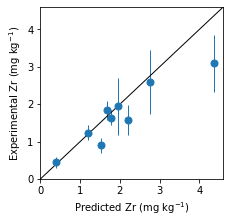

In [173]:
f,a = plt.subplots(figsize=[3.3,3.2])
a.errorbar(bernini.modelled_zr,bernini.Zr,yerr=bernini.Zr_sd,lw=0,elinewidth=1,
           marker='o',markersize=7)
# a.errorbar(bernini.modelled_zr[bernini['T']<1000],bernini.Zr[bernini['T']<1000],yerr=bernini.Zr_sd[bernini['T']<1000],lw=0,elinewidth=1,
#            marker='o')

a.set_xlim(0,4.6)
a.set_ylim(0,4.6)
a.plot([0,5],[0,5],c='k',lw=1)
a.set_xlabel(r'Predicted Zr (mg kg$^{-1}$)')
a.set_ylabel(r'Experimental Zr (mg kg$^{-1}$)')
f.tight_layout()


f.savefig('GS_plots/BerniniFit.pdf')
plt.show()

## Zircon/Baddeleyite in NaOH

In [106]:
d = pd.read_csv('Wilke_NaOH.csv')
d

,T_C,P_Mpa,Zr_ppm,NaOH_wtpt,Zr_sd
0,500,540,166,24,2.0
1,600,930,359,24,2.0
2,300,60,32,22,1.0
3,400,210,34,22,1.0
4,500,370,88,22,2.0
5,500,110,51,21,0.2
6,600,210,116,21,2.0
7,700,350,231,21,2.0


In [118]:
elements = ['H','O','Zr','Na']
basis_species = [H2O,dewDB['H+'],dewDB['ZrO2,aq'],dewDB['Na+'],O2]
other_species = [dewDB['HZrO3-'],dewDB['O2,aq'],dewDB['NaOH,aq'],
                 dewDB['OH-'],
                 ]
minerals = [Bad]
hydrated_species = {'SiO2,aq':2,'Fe(HSiO3)+':1,'FeO,aq':1,'Mg(HSiO3)+':1,'MgO,aq':1,
                    'Si2O4,aq':3,'Ca(HSiO3)+':1,'Si2O4(OH)-':2,'HAlO2,aq':1,'Si3O6,aq':4,
                    'ZrO2,aq':2,'HZrO3-':2,'NaSi3O7-':3}
sys = dew.system(basis_species,other_species,elements,minerals)

Validation routine should check the basis species are compatible with the elements.


In [119]:
modelzr = np.zeros(np.shape(d)[0])
for i, row in d.iterrows():
    t = row['T_C']+273.15
    p = row['P_Mpa']*10

    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)
    
    molalities = [['Na+',row.NaOH_wtpt/(100-row.NaOH_wtpt)/(23+17)*1000]]

    mineral_eq = [['ZrO2,aq','baddeleyite']]

    fluid.make_input_molalities(mineral_eq=mineral_eq,molalities=molalities)
    dew.run_eq3()

    res = dew.eq3output(suppress_warnings=True)

    try:
        modelzr[i] = float(res.elemental_comp[res.elemental_comp.element=='ZR'].ppm.iloc[0])
    except:
        modelzr[i] = np.nan

d['modelled_zr'] = modelzr
d

,T_C,P_Mpa,Zr_ppm,NaOH_wtpt,Zr_sd,modelled_zr
0,500,540,166,24,2.0,163.7347
1,600,930,359,24,2.0,736.3232
2,300,60,32,22,1.0,10.7408
3,400,210,34,22,1.0,32.4742
4,500,370,88,22,2.0,103.6723
5,500,110,51,21,0.2,59.7231
6,600,210,116,21,2.0,93.8770
7,700,350,231,21,2.0,243.5014


In [121]:
d['Zr_mgkg'] = d.Zr_ppm/(100-d.NaOH_wtpt)*100
d

,T_C,P_Mpa,Zr_ppm,NaOH_wtpt,Zr_sd,modelled_zr,Zr_mgkg
0,500,540,166,24,2.0,163.7347,218.421053
1,600,930,359,24,2.0,736.3232,472.368421
2,300,60,32,22,1.0,10.7408,41.025641
3,400,210,34,22,1.0,32.4742,43.589744
4,500,370,88,22,2.0,103.6723,112.820513
5,500,110,51,21,0.2,59.7231,64.556962
6,600,210,116,21,2.0,93.8770,146.835443
7,700,350,231,21,2.0,243.5014,292.405063


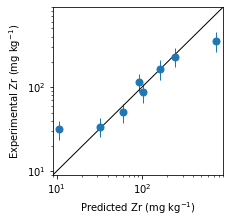

In [171]:
f,a = plt.subplots(figsize=[3.3,3.2])
a.errorbar(d.modelled_zr,d.Zr_ppm,yerr=d.Zr_mgkg*0.2,lw=0,elinewidth=1,
           marker='o',markersize=7)
# a.errorbar(bernini.modelled_zr[bernini['T']<1000],bernini.Zr[bernini['T']<1000],yerr=bernini.Zr_sd[bernini['T']<1000],lw=0,elinewidth=1,
#            marker='o')

a.set_xlim(9,900)
a.set_ylim(9,900)
a.set_xscale('log')
a.set_yscale('log')
a.plot([1,1000],[1,1000],c='k',lw=1)
a.set_xlabel(r'Predicted Zr (mg kg$^{-1}$)')
a.set_ylabel(r'Experimental Zr (mg kg$^{-1}$)')
f.tight_layout()
f.savefig('GS_plots/BadNaOHFit.pdf')
plt.show()

## NS2/NS3 

In [139]:
wilke = pd.read_csv('Wilke_predictions.csv')
wilke

,Unnamed: 0,T_C,P_MPa,Zr_ppm,glass_comp,glass_wtpt,quartz,P_bar,T_K,Zr_mgkg,Zr_pred
0,0,500,430,21,NS3,10,1,4300,773.15,23.333333,56.0756
1,1,550,510,25,NS3,10,1,5100,823.15,27.777778,72.7549
2,2,600,600,28,NS3,10,0,6000,873.15,31.111111,79.0679
3,3,650,670,28,NS3,10,0,6700,923.15,31.111111,84.4666
4,4,750,840,36,NS3,10,0,8400,1023.15,40.000000,78.4767
5,5,550,400,86,NS3,10,0,4000,823.15,95.555556,136.9444
6,6,650,540,58,NS3,10,0,5400,923.15,64.444444,158.0987
7,7,750,700,54,NS3,10,0,7000,1023.15,60.000000,116.3033
8,8,550,430,562,NS3,18,0,4300,823.15,685.365854,363.6579
9,9,600,500,463,NS3,18,0,5000,873.15,564.634146,427.0479


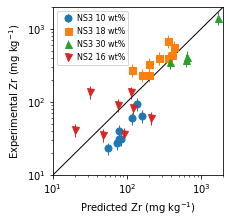

In [169]:
f,a = plt.subplots(figsize=[3.3,3.2])
a.errorbar(wilke.Zr_pred[wilke.glass_wtpt==10],
           wilke.Zr_mgkg[wilke.glass_wtpt==10],
           yerr=wilke.Zr_mgkg[wilke.glass_wtpt==10]*0.2,
           lw=0,elinewidth=1,marker='o',markersize=7,
           label='NS3 10 wt%')
a.errorbar(wilke.Zr_pred[wilke.glass_wtpt==18],
           wilke.Zr_mgkg[wilke.glass_wtpt==18],
           yerr=wilke.Zr_mgkg[wilke.glass_wtpt==18]*0.2,
           lw=0,elinewidth=1,marker='s',markersize=7,
           label='NS3 18 wt%')
a.errorbar(wilke.Zr_pred[wilke.glass_wtpt==30],
           wilke.Zr_mgkg[wilke.glass_wtpt==30],
           yerr=wilke.Zr_mgkg[wilke.glass_wtpt==30]*0.2,
           lw=0,elinewidth=1,marker='^',markersize=7,
           label='NS3 30 wt%')
a.errorbar(wilke.Zr_pred[wilke.glass_wtpt==16],
           wilke.Zr_mgkg[wilke.glass_wtpt==16],
           yerr=wilke.Zr_mgkg[wilke.glass_wtpt==16]*0.2,
           lw=0,elinewidth=1,marker='v',markersize=7,
           label='NS2 16 wt%')

a.set_xlim(10,2000)
a.set_ylim(10,2000)
a.set_xscale('log')
a.set_yscale('log')
a.plot([1,2000],[1,2000],c='k',lw=1)
a.set_xlabel(r'Predicted Zr (mg kg$^{-1}$)')
a.set_ylabel(r'Experimental Zr (mg kg$^{-1}$)')
a.legend(fontsize=8,handletextpad=0.1)
f.tight_layout()

f.savefig('GS_plots/NS23Fit.pdf')
plt.show()

## Mafic Amphibolite 5 kbar T-series

In [201]:
elements = ['H','O','Zr','Na','Cl','K','Ca','Mg','Fe','Al','C','Si']
basis_species = [H2O,dewDB['H+'],dewDB['ZrO2,aq'],dewDB['Na+'],dewDB['Cl-'],dewDB['K+'],
                 dewDB['Ca+2'],dewDB['Mg+2'],dewDB['Fe+2'],dewDB['Al+3'],dewDB['CO2,aq'],
                 dewDB['SiO2,aq'],O2]
other_species = [dewDB['Fe(HSiO3)+'],dewDB['Fe(OH)+'],dewDB['FeO,aq'],dewDB['FeCl+'],
                 dewDB['Fe+3'],dewDB['FeCl+2'],dewDB['FeCl2,aq'],dewDB['FeCl2+'],
                 dewDB['FeCl3,aq'],dewDB['FeCl4-'],
                 dewDB['Mg(HSiO3)+'],dewDB['MgO,aq'],dewDB['MgOH+'],
                 dewDB['Mg(HCO3)+'],dewDB['MgCl+'],dewDB['MgCO3,aq'],
                 dewDB['Ca(HCO3)+'],dewDB['Ca(HCOO)+'],dewDB['Ca(OH)+'],dewDB['CaCl+'],
                 dewDB['CaCO3,aq'],dewDB['Ca(HSiO3)+'],
                 dewDB['CO,aq'],dewDB['CO3-2'],dewDB['HCO3-'],dewDB['H2CO3,aq'],
                 dewDB['HCl,aq'],dewDB['O2,aq'],
                 dewDB['KCl,aq'],dewDB['KOH,aq'],
                 dewDB['NaCl,aq'],dewDB['NaCO3-'],dewDB['NaHCO3,aq'],dewDB['NaSi3O7-'],
                 dewDB['NaOH,aq'],dewDB['H2,aq'],
                 dewDB['Si2O4,aq'],dewDB['Si3O6,aq'],dewDB['HSiO3-'],dewDB['OH-'],
                 dewDB['HZrO3-'],dewDB['NaZrSi6O-'],dewDB['Si2O4(OH)-'],
                 dewDB['AlO2-'],dewDB['AlO2(SiO2)-'],dewDB['HAlO2,aq']]
minerals = [Ab,Or,An,Phl,Prp,Alm,Grs,Qz,Zrc,Ann,Ms,Mag,Tr]
solid_solutions = {'K-Feldspar':['Ab','Or'],
                   'Plagioclase':['Ab','An'],
                   'Biotite':['Phl','Ann'],
                   'Garnet':['Prp','Alm','Grs']}
hydrated_species = {'SiO2,aq':2,'Fe(HSiO3)+':1,'FeO,aq':1,'Mg(HSiO3)+':1,'MgO,aq':1,
                    'Si2O4,aq':3,'Ca(HSiO3)+':1,'Si2O4(OH)-':2,'HAlO2,aq':1,'Si3O6,aq':4,
                    'ZrO2,aq':2,'HZrO3-':2,'NaSi3O7-':3}
sys = dew.system(basis_species,other_species,elements,minerals,
                 solid_solutions=solid_solutions,hydrated_species=hydrated_species)

Validation routine should check the basis species are compatible with the elements.


In [202]:
tt = np.linspace(500,700,20)+273.15
p = 5000

results = []

for i in range(len(tt)):
    t = tt[i]
    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)
    molalities = [['Cl-',0.5],
                  ['CO2,aq',0.01],
                  ['Na+',0.3],
                  ['K+',0.01]]
    mineral_eq = [['SiO2,aq','Qz'],
                  ['ZrO2,aq','zircon'],
                  ['Ca+2',['Plagioclase','An']],
                  ['Mg+2','Tr'],
                  ['Fe+2','Mag'],
                  ['Al+3',['Plagioclase','Ab']]]

    solid_solutions = {'Plagioclase':[['Ab',0.5],['An',0.5]],
                       'Biotite':[['Phl',0.45],['Ann',0.55]],
                       'Garnet':[['Prp',0.1],['Alm',0.6],['Grs',0.3]]}

    nxmods = [['Tr',1,1,-0.7]]


    fluid.make_input_molalities(molalities=molalities,
                                mineral_eq=mineral_eq,
                                solid_solutions=solid_solutions,
                                pH=5.0,uebal='H+',uacion='Cl-',
                                nxmods=nxmods,
                               fo2=-17.8)

    dew.run_eq3()
    res = dew.eq3output(suppress_warnings=True)

    results.append(res)

/Users/simonmatthews/Dropbox/projects/ENKI-DEW/eq3wrap/Zr_solubility_calibration/DEW_tools.py:243: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ss_info = pd.Series()


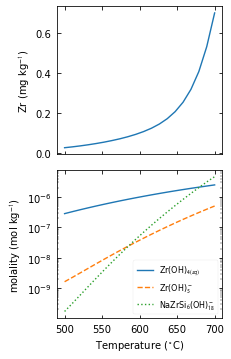

In [203]:
zr = []
zro2 = []
hzro3 = []
nazrsi = []
si = []
pH = []
for res in results:
    zr.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='ZR'].iloc[0]))
    si.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='SI'].iloc[0]))
    pH.append(float(res.electrochemistry.pH[res.electrochemistry.scale=='internal ph'].iloc[0]))
    zro2.append(float(res.aqueous_species.molality[res.aqueous_species.species=='ZrO2,aq'].iloc[0]))
    hzro3.append(float(res.aqueous_species.molality[res.aqueous_species.species=='HZrO3-'].iloc[0]))
    nazrsi.append(float(res.aqueous_species.molality[res.aqueous_species.species=='NaZrSi6O-'].iloc[0]))
zr = np.array(zr)
si = np.array(si)
pH = np.array(pH)
zro2 = np.array(zro2)
hzro3 = np.array(hzro3)
nazrsi = np.array(nazrsi)
tot = zro2 + hzro3 + nazrsi

    
f,a = plt.subplots(2,1,figsize=(3.3,5.1),sharex='col')

a[0].plot(tt-273.15,zr)
a[0].set_ylabel(r'Zr (mg kg$^{-1}$)')
# a[0].set_yscale('log')

# a[1].plot(tt-273.15,zro2/tot,label=r'ZrO$_{2(aq)}$')
# a[1].plot(tt-273.15,hzro3/tot,label=r'HZrO3$^-$')
# a[1].plot(tt-273.15,nazrsi/tot,label=r'NaZrSi$_6$O$^-$')
a[1].plot(tt-273.15,zro2,label=r'Zr(OH)$_{4(aq)}$')
a[1].plot(tt-273.15,hzro3,label=r'Zr(OH)$_5^-$',ls='--')
a[1].plot(tt-273.15,nazrsi,label=r'NaZrSi$_6$(OH)$_{18}^-$',ls=':')
a[1].legend()
a[1].set_yscale('log')
a[1].set_ylabel(r'molality (mol kg$^{-1}$)')

a[1].set_xlabel(r'Temperature ($^\circ$C)')
f.tight_layout()

f.savefig('GS_plots/MaficAmphibolite.pdf')
plt.show()

## Felsic Amphibolite 5 kbar T-series

In [204]:
elements = ['H','O','Zr','Na','Cl','K','Ca','Mg','Fe','Al','C','Si']
basis_species = [H2O,dewDB['H+'],dewDB['ZrO2,aq'],dewDB['Na+'],dewDB['Cl-'],dewDB['K+'],
                 dewDB['Ca+2'],dewDB['Mg+2'],dewDB['Fe+2'],dewDB['Al+3'],dewDB['CO2,aq'],
                 dewDB['SiO2,aq'],O2]
other_species = [dewDB['Fe(HSiO3)+'],dewDB['Fe(OH)+'],dewDB['FeO,aq'],dewDB['FeCl+'],
                 dewDB['Fe+3'],dewDB['FeCl+2'],dewDB['FeCl2,aq'],dewDB['FeCl2+'],
                 dewDB['FeCl3,aq'],dewDB['FeCl4-'],
                 dewDB['Mg(HSiO3)+'],dewDB['MgO,aq'],dewDB['MgOH+'],
                 dewDB['Mg(HCO3)+'],dewDB['MgCl+'],dewDB['MgCO3,aq'],
                 dewDB['Ca(HCO3)+'],dewDB['Ca(HCOO)+'],dewDB['Ca(OH)+'],dewDB['CaCl+'],
                 dewDB['CaCO3,aq'],dewDB['Ca(HSiO3)+'],
                 dewDB['CO,aq'],dewDB['CO3-2'],dewDB['HCO3-'],dewDB['H2CO3,aq'],
                 dewDB['HCl,aq'],dewDB['O2,aq'],
                 dewDB['KCl,aq'],dewDB['KOH,aq'],
                 dewDB['NaCl,aq'],dewDB['NaCO3-'],dewDB['NaHCO3,aq'],dewDB['NaSi3O7-'],
                 dewDB['NaOH,aq'],dewDB['H2,aq'],
                 dewDB['Si2O4,aq'],dewDB['Si3O6,aq'],dewDB['HSiO3-'],dewDB['OH-'],
                 dewDB['HZrO3-'],dewDB['NaZrSi6O-'],dewDB['Si2O4(OH)-'],
                 dewDB['AlO2-'],dewDB['AlO2(SiO2)-'],dewDB['HAlO2,aq']]
minerals = [Ab,Or,An,Phl,Prp,Alm,Grs,Qz,Zrc,Ann,Sil,Ms,Clc]
solid_solutions = {'K-Feldspar':['Ab','Or'],
                   'Plagioclase':['Ab','An'],
                   'Biotite':['Phl','Ann'],
                   'Garnet':['Prp','Alm','Grs']}
hydrated_species = {'SiO2,aq':2,'Fe(HSiO3)+':1,'FeO,aq':1,'Mg(HSiO3)+':1,'MgO,aq':1,
                    'Si2O4,aq':3,'Ca(HSiO3)+':1,'Si2O4(OH)-':2,'HAlO2,aq':1,'Si3O6,aq':4,
                    'ZrO2,aq':2,'HZrO3-':2,'NaSi3O7-':3}
sys = dew.system(basis_species,other_species,elements,minerals,
                 solid_solutions=solid_solutions,hydrated_species=hydrated_species)

Validation routine should check the basis species are compatible with the elements.


In [205]:
tt = np.linspace(580,660,20)+273.15
p = 5000

results = []

for i in range(len(tt)):
    t = tt[i]
    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)
    molalities = [['Cl-',1.0],
                  ['CO2,aq',0.01],
                  ['Na+',0.5]]
    mineral_eq = [['SiO2,aq','Qz'],
                  ['ZrO2,aq','zircon'],
                  ['K+','Ms'],
                  ['Ca+2',['Plagioclase','An']],
                  ['Mg+2',['Biotite','Phl']],
                  ['Fe+2',['Biotite','Ann']],
                  ['Al+3','Sil'],
                  ['H+',['Plagioclase','Ab']]]

    solid_solutions = {'K-Feldspar':[['Ab',0.73],['Or',0.27]],
                       'Plagioclase':[['Ab',0.8],['An',0.2]],
                       'Biotite':[['Phl',0.45],['Ann',0.55]],
                       'Garnet':[['Prp',0.1],['Alm',0.6],['Grs',0.3]]}


    fluid.make_input_molalities(molalities=molalities,
                                mineral_eq=mineral_eq,
                                solid_solutions=solid_solutions,
                                pH=None,uebal='Na+',uacion='Cl-',
                               fo2=-17.8)

    dew.run_eq3()
    res = dew.eq3output(suppress_warnings=True)
    results.append(res)

/Users/simonmatthews/Dropbox/projects/ENKI-DEW/eq3wrap/Zr_solubility_calibration/DEW_tools.py:243: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ss_info = pd.Series()


In [206]:
tt = np.linspace(500,580,10)+273.15
p = 5000

results_4kbar = []

for i in range(len(tt)):
    t = tt[i]
    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)
    molalities = [['Cl-',1.0],
                  ['CO2,aq',0.01],
                  ['Na+',0.5]]
    mineral_eq = [['SiO2,aq','Qz'],
                  ['ZrO2,aq','zircon'],
                  ['K+','Ms'],
                  ['Ca+2',['Plagioclase','An']],
                  ['Mg+2',['Biotite','Phl']],
                  ['Fe+2',['Biotite','Ann']],
                  ['Al+3','Clc'],
                  ['H+',['Plagioclase','Ab']]]

    solid_solutions = {'K-Feldspar':[['Ab',0.73],['Or',0.27]],
                       'Plagioclase':[['Ab',0.8],['An',0.2]],
                       'Biotite':[['Phl',0.45],['Ann',0.55]]}


    fluid.make_input_molalities(molalities=molalities,
                                mineral_eq=mineral_eq,
                                solid_solutions=solid_solutions,
                                pH=None,uebal='Na+',uacion='Cl-',
                               fo2=-17.8)

    dew.run_eq3()
    res = dew.eq3output(suppress_warnings=True)
    results_4kbar.append(res)

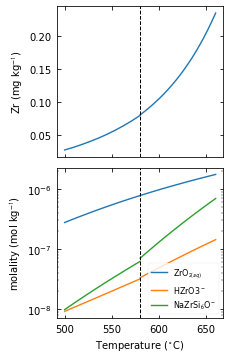

In [207]:
tt = np.linspace(580,660,20)+273.15
tt4 = np.linspace(500,580,10)+273.15
zr = []
zro2 = []
hzro3 = []
nazrsi = []
si = []
pH = []
for res in results:
    zr.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='ZR'].iloc[0]))
    si.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='SI'].iloc[0]))
    pH.append(float(res.electrochemistry.pH[res.electrochemistry.scale=='internal ph'].iloc[0]))
    zro2.append(float(res.aqueous_species.molality[res.aqueous_species.species=='ZrO2,aq'].iloc[0]))
    hzro3.append(float(res.aqueous_species.molality[res.aqueous_species.species=='HZrO3-'].iloc[0]))
    nazrsi.append(float(res.aqueous_species.molality[res.aqueous_species.species=='NaZrSi6O-'].iloc[0]))
zr = np.array(zr)
si = np.array(si)
pH = np.array(pH)
zro2 = np.array(zro2)
hzro3 = np.array(hzro3)
nazrsi = np.array(nazrsi)
tot = zro2 + hzro3 + nazrsi

zr_4 = []
zro2_4 = []
hzro3_4 = []
nazrsi_4 = []
si_4 = []
pH_4 = []
for res in results_4kbar:
    zr_4.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='ZR'].iloc[0]))
    si_4.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='SI'].iloc[0]))
    pH_4.append(float(res.electrochemistry.pH[res.electrochemistry.scale=='internal ph'].iloc[0]))
    zro2_4.append(float(res.aqueous_species.molality[res.aqueous_species.species=='ZrO2,aq'].iloc[0]))
    hzro3_4.append(float(res.aqueous_species.molality[res.aqueous_species.species=='HZrO3-'].iloc[0]))
    nazrsi_4.append(float(res.aqueous_species.molality[res.aqueous_species.species=='NaZrSi6O-'].iloc[0]))
zr_4 = np.array(zr_4)
si_4 = np.array(si_4)
pH_4 = np.array(pH_4)
zro2_4 = np.array(zro2_4)
hzro3_4 = np.array(hzro3_4)
nazrsi_4 = np.array(nazrsi_4)
    
f,a = plt.subplots(2,1,figsize=(3.3,5.1),sharex='col')

a[0].plot(tt-273.15,zr,c='C0')
a[0].plot(tt4-273.15,zr_4,c='C0')
a[0].set_ylabel(r'Zr (mg kg$^{-1}$)')
# a[0].set_yscale('log')

# a[1].plot(tt-273.15,zro2/tot,label=r'ZrO$_{2(aq)}$')
# a[1].plot(tt-273.15,hzro3/tot,label=r'HZrO3$^-$')
# a[1].plot(tt-273.15,nazrsi/tot,label=r'NaZrSi$_6$O$^-$')
a[1].plot(tt-273.15,zro2,label=r'ZrO$_{2(aq)}$')
a[1].plot(tt-273.15,hzro3,label=r'HZrO3$^-$')
a[1].plot(tt-273.15,nazrsi,label=r'NaZrSi$_6$O$^-$')
a[1].plot(tt4-273.15,zro2_4,c='C0')
a[1].plot(tt4-273.15,hzro3_4,c='C1')
a[1].plot(tt4-273.15,nazrsi_4,c='C2')
a[1].legend(loc='lower right')
a[1].set_yscale('log')
a[1].set_ylabel(r'molality (mol kg$^{-1}$)')

a[1].set_xlabel(r'Temperature ($^\circ$C)')

for ax in a:
    ax.axvline(580,c='k',lw=1,ls='--')

f.tight_layout()
f.savefig('GS_plots/FelsicAmphibolite.pdf')
plt.show()

## Mafic Zoisite Eclogite 28 kbar T-series

In [197]:
elements = ['H','O','Zr','Na','Cl','K','Ca','Mg','Fe','Al','C','Si']
basis_species = [H2O,dewDB['H+'],dewDB['ZrO2,aq'],dewDB['Na+'],dewDB['Cl-'],dewDB['K+'],
                 dewDB['Ca+2'],dewDB['Mg+2'],dewDB['Fe+2'],dewDB['Al+3'],dewDB['CO2,aq'],
                 dewDB['SiO2,aq'],O2]
other_species = [dewDB['Fe(HSiO3)+'],dewDB['Fe(OH)+'],dewDB['FeO,aq'],dewDB['FeCl+'],
                 dewDB['Fe+3'],dewDB['FeCl+2'],dewDB['FeCl2,aq'],dewDB['FeCl2+'],
                 dewDB['FeCl3,aq'],dewDB['FeCl4-'],
                 dewDB['Mg(HSiO3)+'],dewDB['MgO,aq'],dewDB['MgOH+'],
                 dewDB['Mg(HCO3)+'],dewDB['MgCl+'],dewDB['MgCO3,aq'],
                 dewDB['Ca(HCO3)+'],dewDB['Ca(HCOO)+'],dewDB['Ca(OH)+'],dewDB['CaCl+'],
                 dewDB['CaCO3,aq'],dewDB['Ca(HSiO3)+'],
                 dewDB['CO,aq'],dewDB['CO3-2'],dewDB['HCO3-'],dewDB['H2CO3,aq'],
                 dewDB['HCl,aq'],dewDB['O2,aq'],
                 dewDB['KCl,aq'],dewDB['KOH,aq'],
                 dewDB['NaCl,aq'],dewDB['NaCO3-'],dewDB['NaHCO3,aq'],dewDB['NaSi3O7-'],
                 dewDB['NaOH,aq'],dewDB['H2,aq'],
                 dewDB['Si2O4,aq'],dewDB['Si3O6,aq'],dewDB['HSiO3-'],dewDB['OH-'],
                 dewDB['HZrO3-'],dewDB['NaZrSi6O-'],dewDB['Si2O4(OH)-'],
                 dewDB['AlO2-'],dewDB['AlO2(SiO2)-'],dewDB['HAlO2,aq']]
minerals = [Prp,Alm,Grs,Qz,Zrc,Di,En,Fs,Jd,Zo,Ms]
solid_solutions = {'Garnet':['Prp','Alm','Grs'],
                   'Opx':['En','Fs'],
                   'Cpx':['Di','Jd'],
                   }
hydrated_species = {'SiO2,aq':2,'Fe(HSiO3)+':1,'FeO,aq':1,'Mg(HSiO3)+':1,'MgO,aq':1,
                    'Si2O4,aq':3,'Ca(HSiO3)+':1,'Si2O4(OH)-':2,'HAlO2,aq':1,'Si3O6,aq':4,
                    'ZrO2,aq':2,'HZrO3-':2,'NaSi3O7-':3}
sys = dew.system(basis_species,other_species,elements,minerals,
                 solid_solutions=solid_solutions,hydrated_species=hydrated_species)

Validation routine should check the basis species are compatible with the elements.


In [198]:
tt = np.linspace(450,700,20)+273.15
p = 28000

results = []

for i in range(len(tt)):
    t = tt[i]
    sys.make_data0(t,p)
    dew.run_eqpt()

    fluid = dew.fluid(sys,[0.1]*len(elements),t,p)
    molalities = [['Cl-',0.5],
                  ['CO2,aq',0.01]]
    mineral_eq = [['SiO2,aq','Qz'],
                  ['ZrO2,aq','zircon'],
                  ['Na+',['Cpx','Jd']],
                  ['Ca+2',['Garnet','Grs']],
                  ['Mg+2',['Opx','En']],
                  ['K+','Ms'],
                  ['Fe+2','Alm'],
                  ['Al+3','Zo']]

    solid_solutions = {'Garnet':[['Prp',0.1],['Alm',0.6],['Grs',0.3]],
                       'Opx':[['En',0.7],['Fs',0.3]],
                       'Cpx':[['Jd',0.5],['Di',0.5]]}



    fluid.make_input_molalities(molalities=molalities,
                                mineral_eq=mineral_eq,
                                solid_solutions=solid_solutions,
                                pH=5.0,uebal='H+',uacion='Cl-',
                                nxmods=nxmods,
                               fo2=-17.8)

    dew.run_eq3()
    res = dew.eq3output(suppress_warnings=True)

    results.append(res)

/Users/simonmatthews/Dropbox/projects/ENKI-DEW/eq3wrap/Zr_solubility_calibration/DEW_tools.py:243: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ss_info = pd.Series()


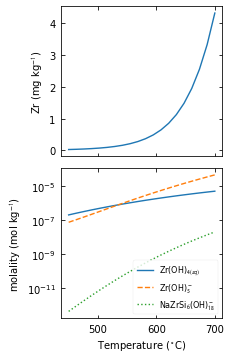

In [199]:
zr = []
zro2 = []
hzro3 = []
nazrsi = []
si = []
pH = []
for res in results:
    zr.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='ZR'].iloc[0]))
    si.append(float(res.elemental_comp.ppm[res.elemental_comp.element=='SI'].iloc[0]))
    pH.append(float(res.electrochemistry.pH[res.electrochemistry.scale=='internal ph'].iloc[0]))
    zro2.append(float(res.aqueous_species.molality[res.aqueous_species.species=='ZrO2,aq'].iloc[0]))
    hzro3.append(float(res.aqueous_species.molality[res.aqueous_species.species=='HZrO3-'].iloc[0]))
    nazrsi.append(float(res.aqueous_species.molality[res.aqueous_species.species=='NaZrSi6O-'].iloc[0]))
zr = np.array(zr)
si = np.array(si)
pH = np.array(pH)
zro2 = np.array(zro2)
hzro3 = np.array(hzro3)
nazrsi = np.array(nazrsi)
tot = zro2 + hzro3 + nazrsi

    
f,a = plt.subplots(2,1,figsize=(3.3,5.1),sharex='col')

a[0].plot(tt-273.15,zr)
a[0].set_ylabel(r'Zr (mg kg$^{-1}$)')
# a[0].set_yscale('log')

# a[1].plot(tt-273.15,zro2/tot,label=r'ZrO$_{2(aq)}$')
# a[1].plot(tt-273.15,hzro3/tot,label=r'HZrO3$^-$')
# a[1].plot(tt-273.15,nazrsi/tot,label=r'NaZrSi$_6$O$^-$')
a[1].plot(tt-273.15,zro2,label=r'Zr(OH)$_{4(aq)}$')
a[1].plot(tt-273.15,hzro3,label=r'Zr(OH)$_5^-$',ls='--')
a[1].plot(tt-273.15,nazrsi,label=r'NaZrSi$_6$(OH)$_{18}^-$',ls=':')
a[1].legend()
a[1].set_yscale('log')
a[1].set_ylabel(r'molality (mol kg$^{-1}$)')

a[1].set_xlabel(r'Temperature ($^\circ$C)')
f.tight_layout()

f.savefig('GS_plots/MaficEclogite.pdf')
plt.show()